In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# What is pandas?

---

# What is it good for?

---

# Let's do some data exploration


## What is pandas? I

<img src="./images/pandas_logo.png" alt="pandas" width="300.px">

[pandas](http://pandas.pydata.org/]):
> **pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

> A few things pandas does well:
- Easy handling of missing data
- Size mutability
- Automatic and explicit data alignment
- Powerful, flexible group by functionality to perform split-apply-combine operations
- Time series-specific functionality
- Robust IO tools
- Flexibel/intuitive merging, joining, reshaping, pivoting
- Data conversion
- Intelligent label-based slicing, fancy indexing, and subsetting


## What is pandas? II

### pandas vs NumPy
- pandas is not a replacement for NumPy
- pandas builds on top of NumPy
- NumPy targets low level array operations, pandas targets data analysis specific tasks
- np.array is plain numbers, pd.DataFrame provides context
- pandas (derives from "panel data") is particularily well suited for tabular data of any kind
- pandas is a central pillar of the [PyData](http://pydata.org/) ecosystem
- pandas is **fast** due to many low-level algoritmic bits being optimized using *Cython*. Nevertheless, generalization usually sacrifices performance.
- pandas is a data analysis and manipulation tool, it is not a statistics pacakge ([statsmodels](https://www.statsmodels.org/) and [scikit-learn](http://scikit-learn.org/stable/) are).

### pandas vs others
- pandas targets tabular data, if you data does not naturally lend itself to this form, other libraries may be more appropriate
- [xarray](https://xarray.pydata.org/en/stable/) targets N-D labeled arrays and datasets
- pandas is inspired by some [R features](https://www.r-project.org/), pandas is not R in/for Python

# Let's take a look I

### Survey of Labour and Income Dynamics

**Description:** 
The SLID data frame has 7425 rows and 5 columns. The data are from the 1994 wave of the Canadian Survey of Labour and Income Dynamics, for the province of Ontario. There are missing data, particularly for wages.

**Source:** https://vincentarelbundock.github.io/Rdatasets/doc/car/SLID.html

In [2]:
!head data/SLID.csv

"","wages","education","age","sex","language"
"1",10.56,15,40,"Male","English"
"2",11,13.2,19,"Male","English"
"3",NA,16,49,"Male","Other"
"4",17.76,14,46,"Male","Other"
"5",NA,8,71,"Male","English"
"6",14,16,50,"Female","English"
"7",NA,12,70,"Female","English"
"8",NA,14.5,42,"Female","English"
"9",8.2,15,31,"Male","English"


In [3]:
# import as pd
import pandas as pd

In [4]:
# load a csv file
path = 'data/SLID.csv'

df = pd.read_csv(path, index_col=0)
df.head()

wages  education  age   sex language
1  10.56       15.0   40  Male  English
2  11.00       13.2   19  Male  English
3    NaN       16.0   49  Male    Other
4  17.76       14.0   46  Male    Other
5    NaN        8.0   71  Male  English

In [5]:
# take a look at the context
df.columns

Index(['wages', 'education', 'age', 'sex', 'language'], dtype='object')

In [6]:
# how large is the table?
df.shape

(7425, 5)

In [7]:
# let's get a description
df.describe()

wages    education          age
count  4147.000000  7176.000000  7425.000000
mean     15.553082    12.496084    43.982761
std       7.883066     3.362506    17.694554
min       2.300000     0.000000    16.000000
25%       9.235000    10.300000    30.000000
50%      14.090000    12.100000    41.000000
75%      19.800000    14.525000    57.000000
max      49.920000    20.000000    95.000000

In [8]:
# do we have missing values?
df.isnull().sum(axis=0)

wages        3278
education     249
age             0
sex             0
language      121
dtype: int64

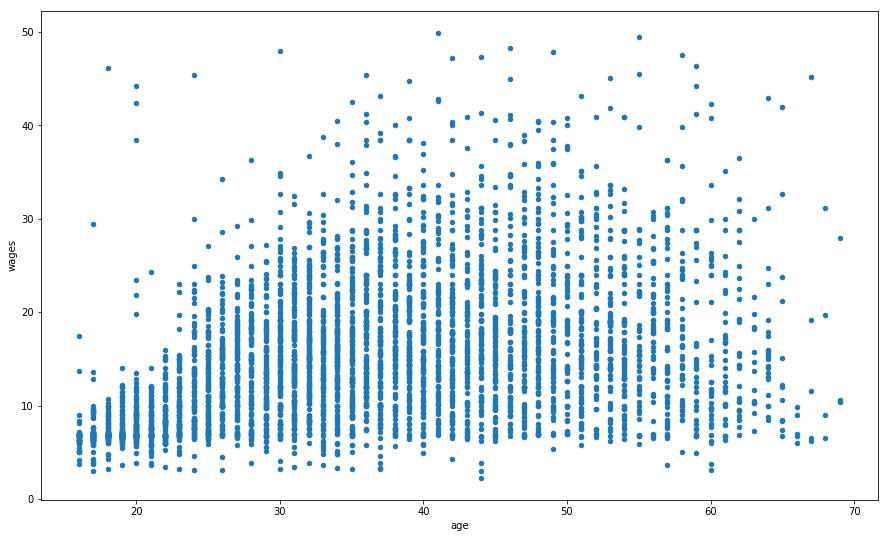

In [9]:
# how does wage depend on age?
fig, ax = plt.subplots(figsize=(15, 9))
df.plot.scatter(x='age', y='wages', ax=ax)

Text(0.5,1,'wages ~ age')

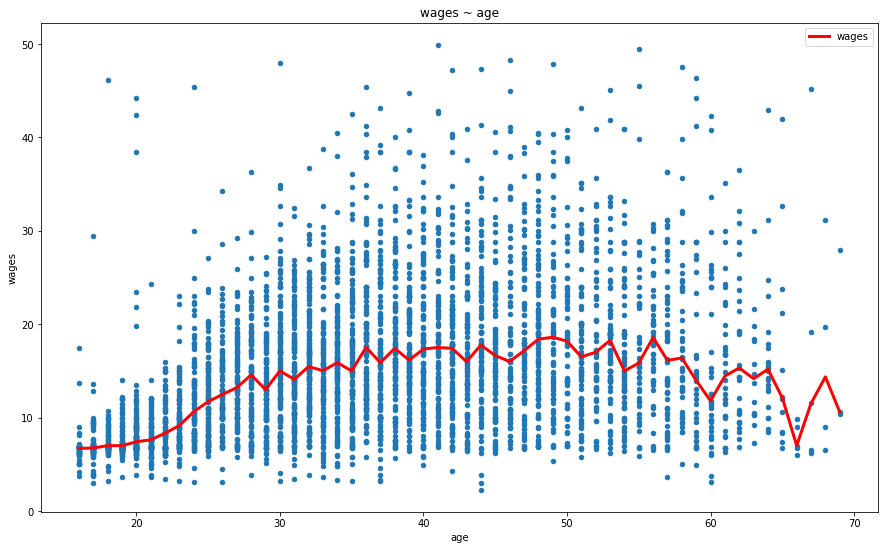

In [10]:
# let's add median wages as well
fig, ax = plt.subplots(figsize=(15, 9))
df.plot.scatter(x='age', y='wages', ax=ax)
df.groupby('age').agg('median').plot(y='wages', ax=ax, color='r', linewidth=3)
ax.set_title('wages ~ age')

In [11]:
# what about wage and sex?
df.groupby('sex')[['wages']].mean()

wages
sex              
Female  13.889576
Male    17.222213

# What did we see?

- Very easy IO:
  - `pd.read_csv`
  
- Very expressive syntax ()
  - `df.describe()`
  - `df.plot`
  - `df.groupby('ages').agg('median')`
  - `df.groupby('sex')[['wages']].mean()`

- `pd.DataFrame` is a high-level data container

- `pd.DataFrame` provides both data as well as tools to work with the data


# A few things good to know I

- pandas is huge
- pandas is very actively developed
- you can go quite far with using only a subset of features

# A few things good to know II

In [12]:
# huge?
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



In [13]:
# comparing a np.array and pd.DataFrame
len(dir(np.array)), len(dir(pd.DataFrame))

(29, 462)

In [14]:
# going far with only a subset of features
# you all know dict
data = {'sex': ['female', 'female', 'male'], 
        'wage': [8, 9, 5]}
data

{'sex': ['female', 'female', 'male'], 'wage': [8, 9, 5]}

In [15]:
# you know how to select in a dict
data['sex']

['female', 'female', 'male']

In [16]:
data['sex'][:2]

['female', 'female']

In [17]:
# therefore you know how to create a DataFrame and select columns
data = {'sex': ['female', 'female', 'male'], 
        'wages': [8, 9, 5]}
df = pd.DataFrame(data)
df

sex  wages
0  female      8
1  female      9
2    male      5

In [18]:
df.columns

Index(['sex', 'wages'], dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [20]:
df.values

array([['female', 8],
       ['female', 9],
       ['male', 5]], dtype=object)

In [21]:
df.dtypes

sex      object
wages     int64
dtype: object

In [22]:
df.shape

(3, 2)

In [23]:
# selection of columns
df['sex']

0    female
1    female
2      male
Name: sex, dtype: object

In [24]:
# selection of columns
df[['sex']]

sex
0  female
1  female
2    male

In [25]:
df[['sex', 'wages']]

sex  wages
0  female      8
1  female      9
2    male      5

In [26]:
# calling a method
df.mean()

wages    7.333333
dtype: float64

In [27]:
# comment: this is similar to numpy
x = np.array([1, 2, 3])
x.mean()

2.0

In [28]:
# note that, as with numpy, you can do
np.mean(x)

2.0

In [29]:
np.mean(df)

wages    7.333333
dtype: float64

In [30]:
# add a new column
df['age'] = [33, 28, 45]
df

sex  wages  age
0  female      8   33
1  female      9   28
2    male      5   45

In [31]:
# more on selection, select rows
df.loc[[0, 2]]

sex  wages  age
0  female      8   33
2    male      5   45

In [32]:
df.iloc[[0, 2]]

sex  wages  age
0  female      8   33
2    male      5   45

In [33]:
# select rows and columns
df.loc[[0, 2], ['sex', 'age']]

sex  age
0  female   33
2    male   45

In [34]:
# add a new variable for indexing
df['id'] = ['a', 'b', 'c']
df

sex  wages  age id
0  female      8   33  a
1  female      9   28  b
2    male      5   45  c

In [35]:
df = df.set_index('id')
df

sex  wages  age
id                    
a   female      8   33
b   female      9   28
c     male      5   45

In [36]:
# select on index
df.loc[['a', 'b'], ['sex', 'wages']]

sex  wages
id               
a   female      8
b   female      9

# Ready for exercises? :)

- pandas cheat sheet:
  - [online](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - [in repo](docs/Pandas_Cheat_Sheet.pdf)

- [exercises](5_pandas_exercises.ipynb)